In [ ]:
import torch
import numpy as np
import pandas as pd
from torch import optim, nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
from torch.utils.data import random_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as td
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import os
from sklearn.model_selection import KFold

In [ ]:
from google.colab import drive
drive_path = '/content/gdrive/'
drive.mount(drive_path)
# folder_path = os.path.join(drive_path, "MyDrive","Colab Notebooks","NewDataSet",)
folder_path = os.path.join(drive_path, "MyDrive","Colab Notebooks","UpdateDataSet",)
# folder_path = os.path.join(drive_path, "MyDrive", "COMP6721 Project","DATASETS", "emotional detection", "data set" )
save_model_path = os.path.join(drive_path, "MyDrive","Colab Notebooks","SaveModels")
save_path = os.path.join(drive_path, "MyDrive","Colab Notebooks",)

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader, random_split

class MyDataset(Dataset):
    def __init__(self, image_folder, metadata_csv, transform=None):
        self.image_data = datasets.ImageFolder(image_folder, transform=transform)
        self.metadata = pd.read_csv(metadata_csv)
        self.metadata.set_index("filename", inplace=True)
        self.gender_to_idx = {'male': 0, 'female': 1, 'othernon':2}
        self.age_to_idx = {'senior': 0, 'middleage':1,'young': 2}

    def __len__(self):
        return len(self.image_data)

    def __getitem__(self, index):
        image, label = self.image_data[index]
        path, _ = self.image_data.imgs[index]
        filename = path.split('/')[-1]  # Adjust this if filenames in metadata include subfolder names
        attributes = self.metadata.loc[filename]

        # Convert attributes to a suitable format (e.g., tensor)
        # Here, I'm assuming age and gender are categorical and need to be converted to integers
        # age = torch.tensor(attributes['age'], dtype=torch.int64)
        # age = torch.tensor(self.age_to_idx[attributes['age'].strip()], dtype=torch.int64)
        # gender = torch.tensor(self.gender_to_idx[attributes['gender'].strip()], dtype=torch.int64)
        age = attributes['age'].strip() if isinstance(attributes['age'], str) else str(attributes['age'])
        age_idx = torch.tensor(self.age_to_idx[age], dtype=torch.int64)
        gender = attributes['gender'].strip() if isinstance(attributes['gender'], str) else str(attributes['gender'])
        gender_idx = torch.tensor(self.gender_to_idx[gender], dtype=torch.int64)

        return image, label, (age_idx, gender_idx)

# Define your transformations
normalize = transforms.Normalize(mean=[0.485], std=[0.229])
transformations = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize((48, 48)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    normalize
])


metadata_csv = save_model_path + "/updatedclassinfo.csv"

# Create an instance of your dataset
dataset = MyDataset(folder_path, metadata_csv, transform=transformations)

# Define the sizes for training, validation, and test sets
train_size = int(0.70 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
batch_size = 32

# Use random_split to split the dataset
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create DataLoader instances for each set
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
import torch
import numpy as np
import pandas as pd
from torch import optim, nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
from torch.utils.data import random_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as td
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import os

class MainModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1=nn.Conv2d(1,64,3,padding=1,stride=1)
        self.B1 = nn.BatchNorm2d(64)
        self.layer2 = nn.Conv2d(64, 128, 3, padding=1, stride=1)
        self.B2 = nn.BatchNorm2d(128)
        self.layer3 = nn.Conv2d(128, 128, 3, padding=1, stride=1)
        self.B3 = nn.BatchNorm2d(128)
        self.layer4 = nn.Conv2d(128, 64, 3, padding=1, stride=1)
        self.B4 = nn.BatchNorm2d(64)
        self.layer5 = nn.Conv2d(64, 64, 3, padding=1, stride=1)
        self.B5 = nn.BatchNorm2d(64)
        self.Maxpool=nn.MaxPool2d(2)
        self.layer6 = nn.Conv2d(64, 128, 3, padding=1, stride=1)
        self.B6 = nn.BatchNorm2d(128)
        self.Maxpool=nn.MaxPool2d(2)
        self.dropout = nn.Dropout(p=0.1)
        self.fc = nn.Linear(128*12*12, 4)

    def forward(self, x):

        x = self.B1(F.leaky_relu(self.layer1(x)))
        x = self.B2(F.leaky_relu(self.layer2(x)))
        x = self.B3(F.leaky_relu(self.layer3(x)))
        x = self.B4(F.leaky_relu(self.layer4(x)))
        x = self.Maxpool(F.leaky_relu(self.layer5(x)))
        x = self.B5(x)
        x = self.B6(self.Maxpool(F.leaky_relu(self.layer6(x))))
        x = self.dropout(x)


        return self.fc(x.view(x.size(0),-1))





In [ ]:
import torch
import numpy as np
import pandas as pd
from torch import optim, nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
from torch.utils.data import random_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as td
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import os

# Convo layers reduced to 4
class Varaint1(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1=nn.Conv2d(1,64,3,padding=1,stride=1)
        self.B1 = nn.BatchNorm2d(64)
        self.layer2 = nn.Conv2d(64, 128, 3, padding=1, stride=1)
        self.B2 = nn.BatchNorm2d(128)
        self.layer3 = nn.Conv2d(128, 64, 3, padding=1, stride=1)
        self.B3 = nn.BatchNorm2d(64)
        self.Maxpool=nn.MaxPool2d(2)
        self.layer4 = nn.Conv2d(64, 128, 3, padding=1, stride=1)
        self.B4 = nn.BatchNorm2d(128)
        self.Maxpool=nn.MaxPool2d(2)
        self.dropout = nn.Dropout(p=0.1)
        self.fc = nn.Linear(128*12*12, 4)

    def forward(self, x):

        x = self.B1(F.leaky_relu(self.layer1(x)))
        x = self.B2(F.leaky_relu(self.layer2(x)))
        x = self.Maxpool(F.leaky_relu(self.layer3(x)))
        x = self.B3(x)
        x = self.B4(self.Maxpool(F.leaky_relu(self.layer4(x))))
        x = self.dropout(x)


        return self.fc(x.view(x.size(0),-1))





In [ ]:
import torch
import numpy as np
import pandas as pd
from torch import optim, nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
from torch.utils.data import random_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as td
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import os

# Kernel is 5
class Varaint2(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Conv2d(1, 64, 5, padding=2, stride=1)
        self.B1 = nn.BatchNorm2d(64)
        self.layer2 = nn.Conv2d(64, 128, 5, padding=2, stride=1)
        self.B2 = nn.BatchNorm2d(128)
        self.layer3 = nn.Conv2d(128, 128, 5, padding=2, stride=1)
        self.B3 = nn.BatchNorm2d(128)
        self.layer4 = nn.Conv2d(128, 64, 5, padding=2, stride=1)
        self.B4 = nn.BatchNorm2d(64)
        self.layer5 = nn.Conv2d(64, 64, 5, padding=2, stride=1)
        self.B5 = nn.BatchNorm2d(64)
        self.Maxpool = nn.MaxPool2d(2)
        self.layer6 = nn.Conv2d(64, 128, 5, padding=2, stride=1)
        self.B6 = nn.BatchNorm2d(128)
        self.Maxpool = nn.MaxPool2d(2)
        self.dropout = nn.Dropout(p=0.1)
        self.fc = nn.Linear(128 * 12 * 12, 4)

    def forward(self, x):

        x = self.B1(F.leaky_relu(self.layer1(x)))
        x = self.B2(F.leaky_relu(self.layer2(x)))
        x = self.B3(F.leaky_relu(self.layer3(x)))
        x = self.B4(F.leaky_relu(self.layer4(x)))
        x = self.Maxpool(F.leaky_relu(self.layer5(x)))
        x = self.B5(x)
        x = self.B6(self.Maxpool(F.leaky_relu(self.layer6(x))))
        x = self.dropout(x)


        return self.fc(x.view(x.size(0),-1))





Epoch 1, Training Loss: 1.2143463802337646
Epoch 1, Validation Loss: 1.0393083799969067
Epoch 2, Training Loss: 0.9399920248985291
Epoch 2, Validation Loss: 0.9818687330592762
Epoch 3, Training Loss: 0.7935390543937683
Epoch 3, Validation Loss: 0.9568924741311506
Epoch 4, Training Loss: 0.658856388926506
Epoch 4, Validation Loss: 0.9593323577534069
Epoch 5, Training Loss: 0.5864616370201111
Epoch 5, Validation Loss: 0.9401977170597423
Epoch 6, Training Loss: 0.48831770062446594
Epoch 6, Validation Loss: 1.0367711240595037
Epoch 7, Training Loss: 0.40494539588689804
Epoch 7, Validation Loss: 0.9948564063418995
Epoch 8, Training Loss: 0.33441596031188964
Epoch 8, Validation Loss: 0.9328493150797758
Epoch 9, Training Loss: 0.2840624397993088
Epoch 9, Validation Loss: 0.9689239697022871
Epoch 10, Training Loss: 0.2374490076303482
Epoch 10, Validation Loss: 0.9255824847654863
Epoch 11, Training Loss: 0.18353161349892616
Epoch 11, Validation Loss: 0.9980946183204651
Epoch 12, Training Loss: 

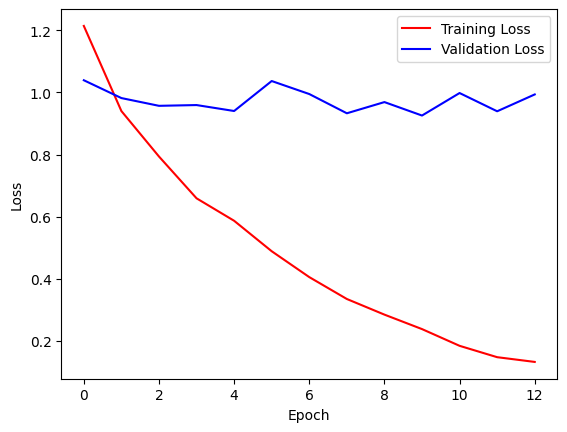

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Change to either MainModel/Variant1/Variant2 to get their analysis is your model class
model = MainModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

epochs = 20
best_val_loss = float('inf')
patience = 3  # Number of epochs to wait after val loss stops decreasing
patience_counter = 0

history1 = []
loss_epoc = []
val_loss_epoc = []

# Train
for epoch in range(epochs):
    running_loss = 0.0
    model.train()
    for data in train_loader:
        instances, labels, _ = data  # Unpacking to ignore attributes (age, gender)
        optimizer.zero_grad()

        outputs = model(instances)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    loss_epoc.append(avg_train_loss)
    print(f"Epoch {epoch + 1}, Training Loss: {avg_train_loss}")

    # Validation
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            instances, labels, _ = data  # Unpacking to ignore attributes (age, gender)
            outputs = model(instances)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

    avg_val_loss = running_val_loss / len(val_loader)
    val_loss_epoc.append(avg_val_loss)
    print(f"Epoch {epoch + 1}, Validation Loss: {avg_val_loss}")

    # Early Stopping Check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0  # Reset patience counter
        torch.save(model, save_model_path + '/best_model7.pth')  # Save the best model
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered")
            break  # Stop training

    history1.append(avg_val_loss)

# Loss and Accuracy graph
plt.plot(np.arange(len(loss_epoc)), loss_epoc, 'r', label='Training Loss')
plt.plot(np.arange(len(val_loss_epoc)), val_loss_epoc, 'b', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



Test Accuracy of the model on the test images: 56.40 %

Confusion Matrix

[[41 29  3 25]
 [20 35  2 24]
 [ 2  4 71  1]
 [11 25  4 47]] 

         angry  bored  focused  neutral
angry       41     29        3       25
bored       20     35        2       24
focused      2      4       71        1
neutral     11     25        4       47 


              precision    recall  f1-score   support

       angry       0.55      0.42      0.48        98
       bored       0.38      0.43      0.40        81
     focused       0.89      0.91      0.90        78
     neutral       0.48      0.54      0.51        87

    accuracy                           0.56       344
   macro avg       0.58      0.58      0.57       344
weighted avg       0.57      0.56      0.56       344



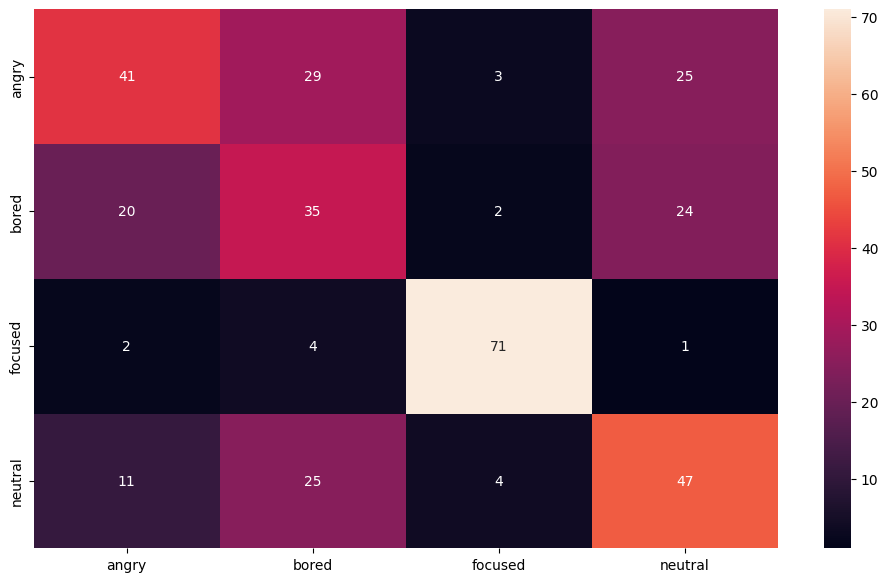

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
import torch

# To evaluuate on test dataset and get confusion matrix

def testSavedModel():
    cnnModel = torch.load(save_model_path + '/best_model7.pth')
    cnnModel.eval()
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for images, labels, _ in test_loader:  # Unpacking to ignore attributes
            outputs = cnnModel(images)
            _, predicted = torch.max(outputs.data, 1)

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    accuracy = np.mean(np.array(all_labels) == np.array(all_predictions))
    print('\nTest Accuracy of the model on the test images: {:.2f} %'.format(accuracy * 100))

    conf_mat = confusion_matrix(all_labels, all_predictions)
    print('\nConfusion Matrix\n')
    print(conf_mat, '\n')

    # Constant for classes - adjust as per your dataset
    classes = ('angry', 'bored', 'focused','neutral')  # Replace with actual class names
    df_cm = pd.DataFrame(conf_mat, index=classes, columns=classes)
    plt.figure(figsize=(12,7))
    sn.heatmap(df_cm, annot=True)
    plt.savefig('output.png')
    print(df_cm, '\n\n')
    print(classification_report(all_labels, all_predictions, target_names=classes))

if __name__ == '__main__':
    testSavedModel()

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch
from torch.utils.data import DataLoader, Subset

# To run the bias analysis results

# Function to load the model
def load_model(model_path):
    model = torch.load(model_path)
    model.eval()
    return model

def get_group_indices(full_dataset, subset, attribute, group):
    subset_indices = subset.indices
    group_indices = [i for i in subset_indices if full_dataset.metadata.iloc[i][attribute] == group]
    return group_indices

def evaluate_model(model, data_loader):
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for images, labels, _ in data_loader:  # Unpack and ignore additional attributes
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions) * 100
    precision, recall, fscore, _ = precision_recall_fscore_support(all_labels, all_predictions, average='macro')
    return round(accuracy, 2), round(precision * 100, 2), round(recall * 100, 2), round(fscore * 100, 2)

# Load the saved model
model_path = save_model_path + '/best_model7.pth'  # Update this path
model = load_model(model_path)

# Initialize variables to store overall metrics
overall_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1score': []}

# Bias Analysis for Demographic Attributes
demographic_attributes = ['age', 'gender']  # List of attributes to analyze
for attribute in demographic_attributes:
    print(f"Analyzing Bias for {attribute.capitalize()} Attribute")

    # Initialize variables to store attribute metrics
    attribute_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1score': []}

    unique_groups = dataset.metadata[attribute].unique()
    for group in unique_groups:
        group_indices = get_group_indices(dataset, test_dataset, attribute, group)
        group_subset = Subset(dataset, group_indices)
        group_loader = DataLoader(group_subset, batch_size=32, shuffle=False)

        accuracy, precision, recall, fscore = evaluate_model(model, group_loader)
        print(f"Metrics for {attribute.capitalize()} = {group}:")
        print(f"Accuracy: {accuracy}%, Precision: {precision}%, Recall: {recall}%, F1-Score: {fscore}%\n")

        # Store group metrics
        attribute_metrics['accuracy'].append(accuracy)
        attribute_metrics['precision'].append(precision)
        attribute_metrics['recall'].append(recall)
        attribute_metrics['f1score'].append(fscore)

        # Accumulate overall metrics
        overall_metrics['accuracy'].append(accuracy)
        overall_metrics['precision'].append(precision)
        overall_metrics['recall'].append(recall)
        overall_metrics['f1score'].append(fscore)

    # Print average metrics for each attribute
    print(f"Average Metrics for {attribute.capitalize()} Attribute:")
    for metric in attribute_metrics:
        average_metric = sum(attribute_metrics[metric]) / len(attribute_metrics[metric])
        print(f"{metric.capitalize()}: {average_metric:.2f}%")

# Print overall system averages
print("\nOverall System Averages:")
for metric in overall_metrics:
    overall_average = sum(overall_metrics[metric]) / len(overall_metrics[metric])
    print(f"{metric.capitalize()}: {overall_average:.2f}%")


Analyzing Bias for Age Attribute
Metrics for Age = middleage:
Accuracy: 57.07%, Precision: 58.03%, Recall: 57.01%, F1-Score: 57.04%

Metrics for Age = senior:
Accuracy: 47.17%, Precision: 50.97%, Recall: 51.9%, F1-Score: 51.01%

Metrics for Age = young:
Accuracy: 56.98%, Precision: 57.36%, Recall: 57.73%, F1-Score: 57.5%

Average Metrics for Age Attribute:
Accuracy: 53.74%
Precision: 55.45%
Recall: 55.55%
F1score: 55.18%
Analyzing Bias for Gender Attribute
Metrics for Gender = female:
Accuracy: 56.3%, Precision: 59.52%, Recall: 57.5%, F1-Score: 57.87%

Metrics for Gender = othernon:
Accuracy: 61.97%, Precision: 60.26%, Recall: 60.39%, F1-Score: 60.05%

Metrics for Gender = male:
Accuracy: 52.9%, Precision: 53.33%, Recall: 55.11%, F1-Score: 52.61%

Average Metrics for Gender Attribute:
Accuracy: 57.06%
Precision: 57.70%
Recall: 57.67%
F1score: 56.84%

Overall System Averages:
Accuracy: 55.40%
Precision: 56.58%
Recall: 56.61%
F1score: 56.01%


In [ ]:
import torch
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
# To test on individiaul images


# Load and preprocess an individual image
def load_and_preprocess_image(image_path):
    transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize((48, 48)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    normalize
    ])

    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = transform(image)
    image = image.unsqueeze(0)  # Add batch dimension
    return image

# Run the model on an individual image
def run_model_on_image(model, image_tensor):
    with torch.no_grad():
        output = model(image_tensor)
        probabilities = F.softmax(output, dim=1)
        predicted_class = torch.argmax(probabilities, dim=1).item()

    return predicted_class, probabilities

# Example Usage:
if __name__ == "__main__":
    # Load the saved model
      # model.eval()
    model = torch.load(save_model_path + '/best_model7.pth')
    # Load and preprocess an individual image
    image_path = save_model_path + "/focusedimge.jpg"
    image_tensor = load_and_preprocess_image(image_path)

    # Run the model on the individual image
    predicted_class, probabilities = run_model_on_image(model, image_tensor)
    print(f"Predicted Class: {predicted_class}")
    print(f"Class Probabilities: {probabilities}")


Predicted Class: 2
Class Probabilities: tensor([[0.0034, 0.0017, 0.9904, 0.0045]])


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
# Hyperparameters
num_epochs = 10
batch_size = 32
learning_rate = 0.0001
num_folds = 10  # Change this to the desired number of folds
val_split = 0.1

# Get the ground truth labels directly from your dataset
all_labels = [label for _, label , _ in dataset]


model = torch.load(save_model_path + '/Part3SavedModel.pth')
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels, _ in val_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

best_accuracy = correct / total

print(f"Accuracy of the pre-trained model on the validation set: {best_accuracy * 100:.2f}%")


# Define the K-fold cross-validator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize a list to store the model's performance metrics
cvscores = []

# Initialize an empty list to store metrics from each fold
all_metrics = []

# Perform K-fold cross-validation
for fold, (train_val_indices, test_indices) in enumerate(kfold.split(all_labels)):
    # Create data loaders for training and testing sets for the current fold
    val_size_fold = int(val_split * len(train_val_indices))
    train_size_fold = len(train_val_indices) - val_size_fold
    train_indices, val_indices = random_split(train_val_indices, [train_size_fold, val_size_fold])


    train_sampler = torch.utils.data.SubsetRandomSampler(train_indices)
    val_sampler = torch.utils.data.SubsetRandomSampler(val_indices)
    test_sampler = torch.utils.data.SubsetRandomSampler(test_indices)

    train_loader = DataLoader(dataset=dataset, batch_size=batch_size, sampler=train_sampler)
    val_loader = DataLoader(dataset=dataset, batch_size=batch_size, sampler=val_sampler)
    test_loader = DataLoader(dataset=dataset, batch_size=batch_size, sampler=test_sampler)


    # Load the pre-trained model
    model = torch.load(save_model_path + '/Part3SavedModel.pth')
    model.train()

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(num_epochs):
        running_loss = 0
        for instances, labels, _ in train_loader:
            optimizer.zero_grad()

            output = model(instances)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch + 1}, Training Loss: {running_loss / len(train_loader)}")

    # Evaluate on the validation set after training
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels , _ in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = correct / total
    print(f"Fold {fold + 1}, Validation Accuracy: {val_accuracy * 100:.2f}%")


    # Evaluation on the test set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels, _ in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Fold {fold + 1}, Accuracy: {accuracy * 100:.2f}%")
    cvscores.append(accuracy)

    # Save the fine-tuned model if it performs better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        torch.save(model, save_model_path + f'/fine_tuned_model_fold_{fold}.pth')

    # Evaluate the model on the test data
    y_test_classes = np.asarray(labels, dtype=np.float32)
    y_pred_classes = np.asarray(predicted, dtype=np.float32)

    # Calculate precision, recall, and F1-score for each fold
    precision_micro = precision_score(y_test_classes, y_pred_classes, average='micro')
    recall_micro = recall_score(y_test_classes, y_pred_classes, average='micro')
    f1_micro = f1_score(y_test_classes, y_pred_classes, average='micro')

    precision_macro = precision_score(y_test_classes, y_pred_classes, average='macro')
    recall_macro = recall_score(y_test_classes, y_pred_classes, average='macro')
    f1_macro = f1_score(y_test_classes, y_pred_classes, average='macro')

    print(f"Metrics - Fold {fold+1}:")
    print(f"Precision (Micro): {precision_micro}")
    print(f"Recall (Micro): {recall_micro}")
    print(f"F1-score (Micro): {f1_micro}")
    print(f"Precision (Macro): {precision_macro}")
    print(f"Recall (Macro): {recall_macro}")
    print(f"F1-score (Macro): {f1_macro}")

    # Store metrics for each fold
    all_metrics.append({
        "Precision (Micro)": precision_micro,
        "Recall (Micro)": recall_micro,
        "F1-score (Micro)": f1_micro,
        "Precision (Macro)": precision_macro,
        "Recall (Macro)": recall_macro,
        "F1-score (Macro)": f1_macro,
    })

# Calculate and print average metrics over all folds
average_metrics = {}
for metric in all_metrics[0]:  # Assuming all folds have the same metrics
    average_metrics[metric] = np.mean([fold[metric] for fold in all_metrics])

print("Average Metrics:")
for metric, value in average_metrics.items():
    print(f"{metric}: {value}")


# Print the average performance
print(f"Average accuracy over {num_folds} folds: {np.mean(cvscores) * 100:.2f}%")

Accuracy of the pre-trained model on the validation set: 59.06%
Epoch 1, Training Loss: 0.5016576735110119
Epoch 2, Training Loss: 0.394340205038416
Epoch 3, Training Loss: 0.3143308653399862
Epoch 4, Training Loss: 0.2556504748504737
Epoch 5, Training Loss: 0.17956391349434853


KeyboardInterrupt: ignored